# Internship Assignment 2024 Coding Challenge: Retrieval-augmented generation (RAG)

### Name: Prasan Navin Hegde
### Mobile: +91 8867414205
### E-mail: nh1.prasan@gmail.com

## Task: Write a Python script that searches the internet for information related to "Canoo", a publicly traded company listed on NASDAQ (ticker symbol: GOEV).
The Python programming script should retrieve and gather data from various online sources and store it in a CSV file for further analysis. https://www.lizmotors.com/internship-coding-assignment2024/

Specific tasks to perform: Write a script that will search the following queries using a internet search APIs, then scrape the data from the links and save in a structured tabular format in a *.csv file

- Identify the industry in which Canoo operates, along with its size, growth rate, trends, and key players.
- Analyze Canoo's main competitors, including their market share, products or services offered, pricing strategies, and marketing efforts.
- Identify key trends in the market, including changes in consumer behavior, technological advancements, and shifts in the competitive landscape.
- Gather information on Canoo's financial performance, including its revenue, profit margins, return on investment, and expense structure.

Deliverables:
- A brief summary of the steps taken to complete the task, including any challenges you faced and how you overcame them.
    - Steps involved to create a solution
    - Techniques and Library used
    - Summary and recommendation
- A link to a GitHub repository containing the Python script and any necessary dependencies.
- A sample output of the data retrieved from the internet, stored in a CSV file or other suitable format.

Last date of submission - 20th Feb 2024

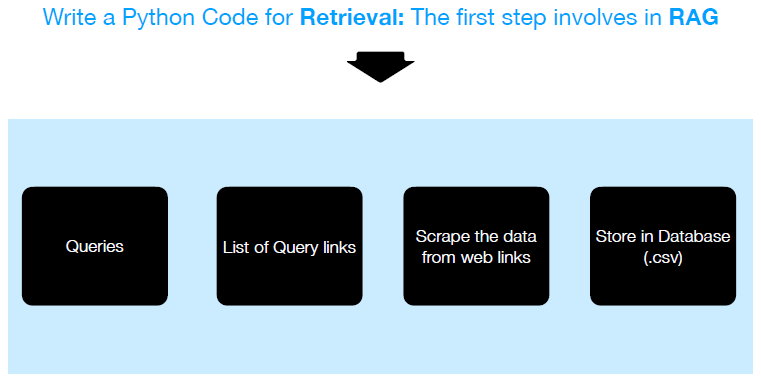

### Steps Involved:
- The first step involved understanding the requirements of the task, which included searching the internet for information (reference links attached at the end of the assignment).
- After understanding the requirements, research was conducted to find suitable libraries and APIs for web scraping and internet search functionalities (DuckDuckGo Search API and BeautifulSoup library)
- The Python script was implemented to perform the following tasks:
    - Utilize the DuckDuckGo Search API to retrieve relevant links for the specified user queries.
    - Scrape HTML data from the retrieved links using BeautifulSoup.
    - Extract relevant information such as titles and content from the HTML data.
    - Store the extracted data in a structured format (CSV file).
- The script was tested with different queries to ensure that it could retrieve relevant data from different sources.
- Comments and documentation were added to the code to explain its functionality and improve readability. The code was also cleaned up to remove any redundant or unnecessary parts.

In [1]:
# Techniques and Libraries Used:
!pip install duckduckgo-search
!python -m duckduckgo_search --help

Usage: duckduckgo_search [OPTIONS] COMMAND1 [ARGS]... [COMMAND2 [ARGS]...]...

  A decorator that creates a command group.

  This decorator is used to create a group of commands. The `chain=True`
  parameter allows the commands in the group to be chained together, meaning
  the output of one command can be used as the input for the next command.

Options:
  --help  Show this message and exit.

Commands:
  answers      CLI function to perform a answers search using DuckDuckGo...
  images       CLI function to perform a images search using DuckDuckGo API.
  maps         CLI function to perform a maps search using DuckDuckGo API.
  news         CLI function to perform a news search using DuckDuckGo API.
  suggestions  CLI function to perform a suggestions search using...
  text         CLI function to perform a text search using DuckDuckGo API.
  translate    CLI function to perform translate using DuckDuckGo API.
  version      A command-line interface command that prints and returns...

In [2]:
# Import all the required libraries
import csv # Used to store the extracted data in a structured tabular format for further analysis.
import requests # Used to make HTTP requests to the desired web pages and retrieve the HTML content.
from bs4 import BeautifulSoup # Used for web scraping to extract data from HTML content retrieved from the links.

from duckduckgo_search import DDGS # Used to search the internet and retrieve relevant links for specified queries.

In [3]:
# 'User input query' which is used to search the internet for useful/relevant/related content
query = input("'Enter your query': ")

#Query1 = "Identify the industry in which Canoo operates, along with its size, growth rate, trends, and key players."
#Query2 = "Analyze Canoo's main competitors, including their market share, products or services offered, pricing strategies, and marketing efforts."
#Query3 = "Identify key trends in the market in which Canoo operates, including changes in consumer behavior, technological advancements, and shifts in the competitive landscape."
#Query4 = "Gather information on Canoo's financial performance, including its revenue, profit margins, return on investment, and expense structure."

'Enter your query': Identify the industry in which Canoo operates, along with its size, growth rate, trends, and key players.


In [4]:
# Retrieve list of most relevant links/URLs for the queries from DuckDuckGo Search results using the text() function.
def get_query_links(query):
    with DDGS() as ddgs:
        search_results = ddgs.text(query, max_results=8)
        links = [result['href'] for result in search_results]
    return links

links = get_query_links(query)
links

['https://incfact.com/company/canoo-torrance-ca/',
 'https://investors.canoo.com/news-presentations/press-releases/detail/111/canoo-selects-google-cloud-technologies-to-maximize-its-data',
 'https://en.wikipedia.org/wiki/Canoo',
 'https://fortune.com/2022/08/29/canoo-ev-startup-scored-deal-worlds-largest-retailer/',
 'https://investors.canoo.com/news-presentations/press-releases/detail/52/canoo-reports-fourth-quarter-and-full-year-2020-results',
 'https://electrek.co/2023/04/10/canoo-goev-2023-customer-deliveries-leasing-oklahoma-manufacturing-facility/',
 'https://seekingalpha.com/article/4412112-canoo-stock-differentiation-potential-in-ev-space-still-show-me-story',
 'https://investors.canoo.com/news-presentations/press-releases/detail/51/canoo-adds-key-leadership-to-accelerate-growth',
 'https://www.reuters.com/business/autos-transportation/canoo-advances-manufacturing-dates-electric-vehicles-2021-11-15/',
 'https://stockanalysis.com/stocks/goev/statistics/']

C:\Users\navin\AppData\Roaming\Python\Python310\site-packages\curl_cffi\aio.py:192: UserWarning: Curlm alread closed! quitting from process_data
  warnings.warn("Curlm alread closed! quitting from process_data")


In [5]:
# Scrape HTML data from web links and transform it into text, to be used later downstream into the prompt as context to the Research Assistant
def scrape_data(links):
    scraped_data = []
    # Send a GET request to the webpages
    for link in links:
        try:
            response = requests.get(link)
            # Check if the request was successful
            if response.status_code == 200:
                # Parse the content of the request with BeautifulSoup
                soup = BeautifulSoup(response.text, 'html.parser')
                # Extract title from the webpage
                title = soup.title.text.strip()
                # Extract all the paragraphs from the webpage
                paragraphs = soup.find_all('p')
                content = ' '.join([p.text.strip() for p in paragraphs])
                scraped_data.append({'Link': link, 'Title': title, 'Content': content})
            else:
                print(f"Failed to fetch data from {link}. Status code: {response.status_code}")
                scraped_data.append({'Link': link, 'Title': 'No data fetched', 'Content': 'No data fetched'})
        except Exception as e:
            print(f"Error fetching data from {link}: {e}")
            scraped_data.append({'Link': link, 'Title': 'Error', 'Content': 'Error'})
    return scraped_data

scraped_data = scrape_data(links)
scraped_data

Failed to fetch data from https://seekingalpha.com/article/4412112-canoo-stock-differentiation-potential-in-ev-space-still-show-me-story. Status code: 403
Failed to fetch data from https://www.reuters.com/business/autos-transportation/canoo-advances-manufacturing-dates-electric-vehicles-2021-11-15/. Status code: 401


[{'Link': 'https://incfact.com/company/canoo-torrance-ca/',
  'Title': "Annual Report on Canoo Technologies's Revenue, Growth, SWOT Analysis & Competitor Intelligence - IncFact",
  'Content': 'Publisher: AnythingResearch\n                \nMarket Size\n                Growth Rate\n                5-Year Market Forecast\n                Average Company Size & Growth\n                Salary & Compensation Benchmarks'},
 {'Link': 'https://investors.canoo.com/news-presentations/press-releases/detail/111/canoo-selects-google-cloud-technologies-to-maximize-its-data',
  'Title': 'Canoo selects Google Cloud technologies to maximize its data :: Canoo Inc. (GOEV)',
  'Content': 'Company to leverage Google Cloud\'s data, analytics, and AI capabilities as it prepares to mass manufacture its electric vehicles JUSTIN, Texas and SUNNYVALE, Calif., Aug. 29, 2023 /PRNewswire/ -- Canoo (NASDAQ: GOEV), a leading high-tech advanced mobility company, today announced that it has selected Google Cloud as its

### Challenges Faced and Solutions:
- Many websites have mechanisms to resist webpage crawling, causing them to be unresponsive to minimal scraping codes. Try/Except block was given to handling such errors during web scraping and also their Status Code is printed.
- DuckDuckGo search results may vary over time due to various factors of SEO (Search Engine Optimization), making it challenging to focus on specific websites. Flexibility in handling dynamic search results is a requirement and hence focusing on specific websites may not make sense unless it is very very important.
- Substandard HTML coding on websites may lead to scraping unwanted data. Special attention needs to be given to data cleaning techniques to ensure relevant information is extracted effectively.
- Websites layouts and content evolve and change over time, making standard Python programs impractical in the long run. Continuous monitoring and adaptation of the scraping process needs to be done which is not sustainable or practical.

In [ ]:
# Store the scraped data in a CSV file
def save_to_csv(data, query):
    filename = "scraped_data.csv"
    with open(filename, mode='a', newline='', encoding='utf-8') as file:
        fieldnames = ['Query', 'Link', 'Title', 'Content']
        writer = csv.DictWriter(file, fieldnames=fieldnames)

        # Write header only if the file is empty
        if file.tell() == 0:
            writer.writeheader()

        # Write rows
        for row in data:
            row['Query'] = query
            writer.writerow(row)

    print(f"Data has been saved to {filename}")

save_to_csv(scraped_data, query)

### Summary and Recommendations:
While the implemented solution provides a starting point for retrieving and analyzing information related to Canoo and its industry, further enhancements are needed to improve reliability and efficiency.
- Consider exploring LLM-based data cleaning techniques, such as those offered by paid API services from OpenAI, for extracting relevant information from the scraped data, making the process more sustainable and reliable.
- Regularly update and maintain the solution to adapt to changes in web page structures, search engine algorithms, and evolving website content.
- Collaborate with domain experts to ensure that the gathered data is accurate, relevant, and actionable for decision-making purposes.

Reference materials used to understand and solve this assignment:
- https://medium.com/@greyboi/ddgsearch-search-duckduckgo-scrape-the-results-in-python-18f5265f1aa6
- https://www.youtube.com/watch?v=DjuXACWYkkU
- https://gist.github.com/hwchase17/69a8cdef9b01760c244324339ab64f0c
- https://python.langchain.com/docs/use_cases/web_scraping
- https://www.ibm.com/docs/en/watsonx-as-a-service?topic=models-retrieval-augmented-generation